<a href="https://colab.research.google.com/github/ervinamaharani/TA-MK-Data-Mining/blob/main/Daming_Kel1_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# changing the working directory
%cd /content/gdrive/My Drive/TA Daming/

Mounted at /content/gdrive
/content/gdrive/My Drive/TA Daming


# **Kaggle Setup**

In [ ]:
# Install Kaggle library
!pip install -q kaggle

In [ ]:
# Colab library to upload files to notebook
from google.colab import files

# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/TA Daming"

In [ ]:
# API command
!kaggle datasets download -d christofel04/cardiovascular-study-dataset-predict-heart-disea

  0% 0.00/74.6k [00:00<?, ?B/s]
100% 74.6k/74.6k [00:00<00:00, 11.2MB/s]


In [ ]:
# unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  cardiovascular-study-dataset-predict-heart-disea.zip
  inflating: test.csv                
  inflating: train.csv               


# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading Files**

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/TA Daming/train.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#drop id column because we dont need it
df.drop(df.columns[0], inplace=True, axis=1)
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#lets get the mean, mode and other information about the dataset
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


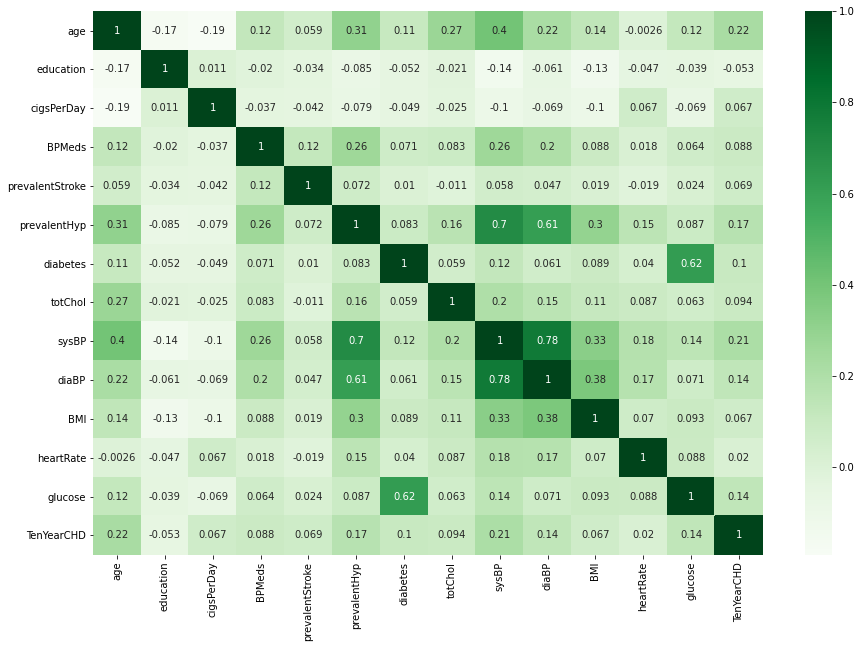

In [ ]:
#Lets plot this
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Greens',annot=True)

In [ ]:
df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

In [ ]:
#Resampling imbalanced dataset classification

# import resample module 
from sklearn.utils import resample

# separate the minority and majority classes
df_majority = df[df['TenYearCHD']==0]
df_minority = df[df['TenYearCHD']==1]

df_majority_undersampled = resample(df_majority, replace=True, n_samples=1695, random_state=0)
df_minority_undersampled = resample(df_minority, replace=True, n_samples=1694, random_state=0)

df = pd.concat([df_minority_undersampled, df_majority_undersampled])
df['TenYearCHD'].value_counts()

0    1695
1    1694
Name: TenYearCHD, dtype: int64

# **Data Preprocessing**

### **Data Cleaning**

In [ ]:
#Checking for missing values
df.isna().sum()

age                  0
education           92
sex                  0
is_smoking           0
cigsPerDay          12
BPMeds              34
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             52
sysBP                0
diaBP                0
BMI                 34
heartRate            1
glucose            267
TenYearCHD           0
dtype: int64

In [ ]:
# #replacing missing value at education attr using mode
modus_edu = df['education'].mode()[0]
df['education'] = df['education'].fillna(modus_edu)

#replacing missing value at BPMeds attr using mode
modus_BP = df['BPMeds'].mode()[0]
df['BPMeds'] = df['BPMeds'].fillna(modus_BP)

#replacing missing values at CigsPerDay attr using mean
rata_cigs = df['cigsPerDay'].mean()
df['cigsPerDay'] = df['cigsPerDay'].fillna(rata_cigs)

#replacing missing values at CigsPerDay attr using mean
rata_tot = df['totChol'].mean()
df['totChol'] = df['totChol'].fillna(rata_tot)

#replacing missing values at CigsPerDay attr using mean
rata_BMI = df['BMI'].mean()
df['BMI'] = df['BMI'].fillna(rata_BMI)

#replacing missing values at CigsPerDay attr using mean
rata_glu = df['glucose'].mean()
df['glucose'] = df['glucose'].fillna(rata_glu)

In [ ]:
#Removing missing values at heart rate attr
df.dropna(axis = 0, inplace = True) 
# print(df.shape)

df.isna().sum()
# df.head()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Outliers** **detection**

In [ ]:
#Checking for unique values of categorical values.
#If number of unique values dont change from the given number of unique values,then we do not have categorical outliers in the data.
cat_cols=['education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'sex','is_smoking','TenYearCHD']#categorical attributes

df[cat_cols].nunique()

education          4
is_smoking         2
BPMeds             2
prevalentStroke    2
prevalentHyp       2
diabetes           2
sex                2
is_smoking         2
TenYearCHD         2
dtype: int64

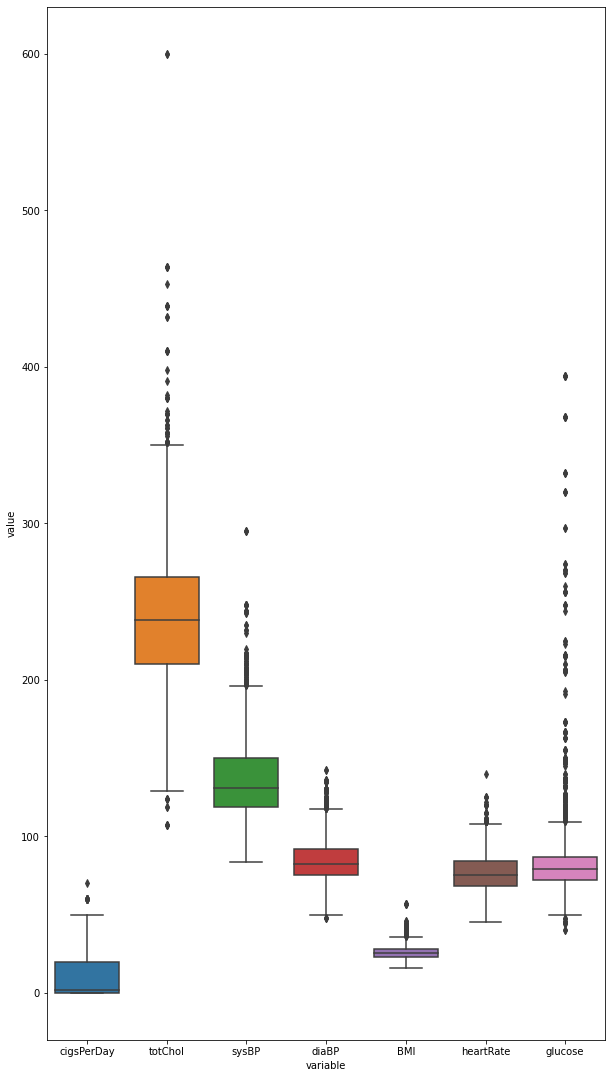

In [ ]:
# The results show that there are no outliers. 
# There are two values for the sex attribute 1-0 and the code above also indicates the same value. 
#This applies to other categorical attributes as well.
numeric_cols=['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

#lets go for box plots of numeric attributes.
plt.figure(figsize=(10,19))
sns.boxplot(x="variable", y="value", data=pd.melt(df[numeric_cols]))
plt.show()

### **Data Transformation**

In [ ]:
#lets scale the numeric columns
# This scaling is done so as the model wont get stuck in local opitmal value and converge fast.
numeric_cols=['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']#numeric attributes
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
# standard scaler scales the columns in range of -1 to 1 based on the value of their mean, and standard deviation.
df[numeric_cols] = standardScaler.fit_transform(df[numeric_cols])
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1151,63,1.0,M,YES,-0.003311,0.0,0,0,0,0.661255,-0.231607,-0.816836,0.935035,-0.344172,0.715414,1
324,59,2.0,F,NO,-0.795801,1.0,0,1,0,0.510258,4.215417,2.977625,-1.469354,-0.014289,1.137773,1
781,56,1.0,F,YES,-0.003311,1.0,0,1,1,0.014124,1.460624,0.948903,0.729141,1.140301,1.625112,1
1291,52,1.0,M,YES,0.789180,0.0,0,0,0,-0.331012,-0.428378,-0.704129,-0.881411,0.727948,0.487989,1
2172,55,1.0,F,NO,-0.795801,0.0,0,1,0,-0.611436,0.949019,0.047249,0.509520,-0.838996,-0.714112,1


In [ ]:
#Transform the categoric columns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['sex'] = labelencoder.fit_transform(df['sex'])
df['is_smoking'] = labelencoder.fit_transform(df['is_smoking'])
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1151,63,1.0,1,1,-0.003311,0.0,0,0,0,0.661255,-0.231607,-0.816836,0.935035,-0.344172,0.715414,1
324,59,2.0,0,0,-0.795801,1.0,0,1,0,0.510258,4.215417,2.977625,-1.469354,-0.014289,1.137773,1
781,56,1.0,0,1,-0.003311,1.0,0,1,1,0.014124,1.460624,0.948903,0.729141,1.140301,1.625112,1
1291,52,1.0,1,1,0.789180,0.0,0,0,0,-0.331012,-0.428378,-0.704129,-0.881411,0.727948,0.487989,1
2172,55,1.0,0,0,-0.795801,0.0,0,1,0,-0.611436,0.949019,0.047249,0.509520,-0.838996,-0.714112,1


### **Feature Selection**

In [ ]:
# for this to work we should first divide the dataset in features and labels.
# features are normally denoted by "x" and labels by "y".
y=df['TenYearCHD']
y=np.array(y)
x=df.drop(columns=['TenYearCHD']) # removed the label column from dataframe and passed it to x

In [ ]:
#Checking the features and target/labels
x.head()
# print(y)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1151,63,1.0,1,1,-0.003311,0.0,0,0,0,0.661255,-0.231607,-0.816836,0.935035,-0.344172,0.715414
324,59,2.0,0,0,-0.795801,1.0,0,1,0,0.510258,4.215417,2.977625,-1.469354,-0.014289,1.137773
781,56,1.0,0,1,-0.003311,1.0,0,1,1,0.014124,1.460624,0.948903,0.729141,1.140301,1.625112
1291,52,1.0,1,1,0.789180,0.0,0,0,0,-0.331012,-0.428378,-0.704129,-0.881411,0.727948,0.487989
2172,55,1.0,0,0,-0.795801,0.0,0,1,0,-0.611436,0.949019,0.047249,0.509520,-0.838996,-0.714112


In [ ]:
# Lets work on feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=500).fit(x, y)
selector = SelectFromModel(clf, prefit=True)
x_columns=x.columns #all columns of x
columns=selector.get_support() #selected list of columns with true and false values
selected_columns=list([x_columns[i] for i in range(len(columns)) if columns[i]]) #creating list of selected columns
print(selected_columns)

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
#selecting these important columns
x_reduced=selector.transform(x)

# **Model Training and Evaluation**

In [ ]:
#splitting the dataset for Training and testing and using 5-fold Cross validation.
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(x_reduced)

#metrics for SVM
SVM_accuracy=[]

#metrics for Random Forest
RF_accuracy=[]

#metrics for KNN
KNN_accuracy=[]

#metrics for Logistic Regression
LR_accuracy=[]

In [ ]:
#importing libraries of the selected algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
#importing libraries of performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Making the classifier Objects
clf_svm=SVC() #SVM object
clf_rf=RandomForestClassifier(max_depth=100, random_state=0)#Random Forest Object
clf_knn = KNeighborsClassifier(n_neighbors=30)#KNN object
clf_lr=LogisticRegression(C= 1, class_weight= None, penalty= 'l2', solver= 'newton-cg')#Logistic regression model

In [ ]:
i=1# count the number of folds
#starting the 5 fold cross valivation
for train_index, test_index in kf.split(x_reduced):
    print("\nNumber of fold: %d"%i)
    i+=1
    #Splitting the data
    X_train, X_test = x_reduced[train_index], x_reduced[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    #Training and Evaluating SVM
    model=clf_svm.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    SVM_accuracy.append(accuracy_score(y_test,y_pred))
    print("Working on SVM")
    
    #Training and Evaluating Random Forest
    model=clf_rf.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    RF_accuracy.append(accuracy_score(y_test,y_pred))
    print("Working on Random Forest")
    
    #Training and Evaluating KNN
    model=clf_knn.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    KNN_accuracy.append(accuracy_score(y_test,y_pred))
    print("Working on KNN")
    
    #Training and Evaluating LR
    model=clf_lr.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    LR_accuracy.append(accuracy_score(y_test,y_pred))
    print("Working on Logistic Regression")


Number of fold: 1
Working on SVM
Working on Random Forest
Working on KNN
Working on Logistic Regression

Number of fold: 2
Working on SVM
Working on Random Forest
Working on KNN
Working on Logistic Regression

Number of fold: 3
Working on SVM
Working on Random Forest
Working on KNN
Working on Logistic Regression

Number of fold: 4
Working on SVM
Working on Random Forest
Working on KNN
Working on Logistic Regression

Number of fold: 5
Working on SVM
Working on Random Forest
Working on KNN
Working on Logistic Regression


In [ ]:
#visualizing average results:
SVM=["SVM ", (sum(SVM_accuracy)/len(SVM_accuracy))]

RF=["RF ", (sum(RF_accuracy)/len(RF_accuracy)) ]

KNN=["KNN ", (sum(KNN_accuracy)/len(KNN_accuracy))]

LR=["LR ", (sum(LR_accuracy)/len(LR_accuracy))]
data=[]
data.append(SVM)
data.append(RF)
data.append(KNN)
data.append(LR)
#converting results to dataframe
results=pd.DataFrame(data,columns=["Algorithms","Accuracy"])
results

,Algorithms,Accuracy
0,SVM,0.400808
1,RF,0.862723
2,KNN,0.485256
3,LR,0.464282


In [ ]:
#Split data x_reduced menjadi train dan test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.3, random_state=1)

In [ ]:
# print(X_train.shape)
# pd.DataFrame(X_train, columns= ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']).head()

# print(X_test.shape)
pd.DataFrame(X_test, columns= ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']).head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,56.0,-1.172283,0.712894,1.324592,-0.378114,0.398065,-0.324241
1,57.0,0.876966,2.168999,1.550006,0.230419,-1.003937,-0.324241
2,48.0,0.747539,1.578686,1.249455,-0.185946,-0.096759,-0.096817
3,40.0,0.661255,0.063550,0.272663,0.276173,0.315594,0.000058
4,52.0,0.121979,-0.585794,-0.253302,0.360818,1.140301,0.423011


**Misal pakai Random Forest**

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

clf4 = RandomForestClassifier()

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf4.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(param_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param  _grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [ ]:
modelRF = RandomForestClassifier(bootstrap = True, max_depth = 30, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 1400)

modelRF.fit(X_train, y_train)

y_pred = modelRF.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print("Accuracy : %.2f%%" % (accuracy * 100.0))

Accuracy : 88.79%


In [ ]:
#importing libraries of performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report 

rf_conf_matrix = confusion_matrix(y_test, y_pred)
rf_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest Classification:",rf_acc_score*100,'\n')
print(classification_report(y_test, y_pred))



confussion matrix
[[421  77]
 [ 37 482]]


Accuracy of Random Forest Classification: 88.79056047197639 

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       498
           1       0.86      0.93      0.89       519

    accuracy                           0.89      1017
   macro avg       0.89      0.89      0.89      1017
weighted avg       0.89      0.89      0.89      1017



**Misal Pakai KNN**

In [ ]:
#importing libraries of the selected algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#importing libraries of performance Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report 

In [ ]:
# m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=20) #nilai n nya ganti-ganti aja
model = knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of k-NN Classification:",knn_acc_score*100,'\n')
print(classification_report(y_test, knn_predict))

confussion matrix
[[351 147]
 [203 316]]


Accuracy of k-NN Classification: 65.5850540806293 

              precision    recall  f1-score   support

           0       0.63      0.70      0.67       498
           1       0.68      0.61      0.64       519

    accuracy                           0.66      1017
   macro avg       0.66      0.66      0.66      1017
weighted avg       0.66      0.66      0.66      1017



In [ ]:
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')


#**Prediksi label pada data baru**

In [ ]:
df_test = pd.read_csv('/content/gdrive/My Drive/TA Daming/test.csv')
df_test.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,3390,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,3391,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
2,3392,58,1.0,F,YES,20.0,0.0,0,1,0,260.0,180.0,100.0,25.56,100.0,NaN
3,3393,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
4,3394,44,1.0,M,NO,0.0,0.0,0,0,0,160.0,118.5,87.0,25.81,54.0,NaN


In [ ]:
#Checking for missing values
df_test.isna().sum()

id                  0
age                 0
education          18
sex                 0
is_smoking          0
cigsPerDay          7
BPMeds              9
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol            12
sysBP               0
diaBP               0
BMI                 5
heartRate           0
glucose            84
dtype: int64

In [ ]:
#Removing missing values
df_test.dropna(axis = 0, inplace = True) 
print(df_test.shape)

(729, 16)


In [ ]:
#drop id column because we dont need it
df_test.drop(df_test.columns[0], inplace=True, axis=1)
df_test.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,43,2.0,M,YES,35.0,0.0,0,0,0,207.0,117.0,65.0,24.42,60.0,100.0
1,56,3.0,F,NO,0.0,0.0,0,0,0,192.0,122.0,82.5,28.61,68.0,58.0
3,47,3.0,F,NO,0.0,0.0,0,0,0,231.0,102.5,66.0,23.40,70.0,78.0
5,41,2.0,F,YES,7.0,0.0,0,0,0,260.0,101.0,68.0,22.49,80.0,77.0
6,59,1.0,M,NO,0.0,0.0,0,0,0,229.0,100.5,66.0,25.18,44.0,81.0


In [ ]:
#lets scale the numeric columns
# This scaling is done so as the model wont get stuck in local opitmal value and converge fast.
test_numeric_cols=['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']#numeric attributes
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
# standard scaler scales the columns in range of -1 to 1 based on the value of their mean, and standard deviation.
df_test[test_numeric_cols] = standardScaler.fit_transform(df_test[numeric_cols])
df_test.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,43,2.0,M,YES,2.184976,0.0,0,0,0,-0.687750,-0.679291,-1.553163,-0.345800,-1.257158,0.799033
1,56,3.0,F,NO,-0.718199,0.0,0,0,0,-1.045395,-0.442284,-0.037715,0.758070,-0.590999,-1.019099
3,47,3.0,F,NO,-0.718199,0.0,0,0,0,-0.115519,-1.366613,-1.466566,-0.614522,-0.424459,-0.153322
5,41,2.0,F,YES,-0.137564,0.0,0,0,0,0.575927,-1.437715,-1.293372,-0.854264,0.408239,-0.196611
6,59,1.0,M,NO,-0.718199,0.0,0,0,0,-0.163205,-1.461416,-1.466566,-0.145575,-2.589476,-0.023456


In [ ]:
#Transform the categoric columns
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_test['sex'] = labelencoder.fit_transform(df_test['sex'])
df_test['is_smoking'] = labelencoder.fit_transform(df_test['is_smoking'])
df_test.head(15)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,43,2.0,1,1,2.184976,0.0,0,0,0,-0.687750,-0.679291,-1.553163,-0.345800,-1.257158,0.799033
1,56,3.0,0,0,-0.718199,0.0,0,0,0,-1.045395,-0.442284,-0.037715,0.758070,-0.590999,-1.019099
3,47,3.0,0,0,-0.718199,0.0,0,0,0,-0.115519,-1.366613,-1.466566,-0.614522,-0.424459,-0.153322
5,41,2.0,0,1,-0.137564,0.0,0,0,0,0.575927,-1.437715,-1.293372,-0.854264,0.408239,-0.196611
6,59,1.0,1,0,-0.718199,0.0,0,0,0,-0.163205,-1.461416,-1.466566,-0.145575,-2.589476,-0.023456
7,41,1.0,0,1,0.526019,0.0,0,0,0,0.146754,0.363541,-0.254208,-1.594568,-0.257920,-0.932522
8,39,3.0,1,1,0.940758,0.0,0,0,0,-2.094485,-1.437715,-1.812954,-0.332627,-0.424459,-0.023456
10,46,2.0,0,0,-0.718199,0.0,0,0,0,-0.163205,-0.300079,-0.254208,0.405042,-0.757539,-0.066744
11,37,2.0,1,1,0.940758,0.0,0,0,0,-0.091676,-0.110473,-0.773790,-0.335261,0.907859,0.279566
12,67,1.0,0,0,-0.718199,1.0,0,1,0,0.647456,3.302434,0.871553,1.134808,-0.008110,-0.153322


In [ ]:
# for this to work we should remove the labels
#drop non-usable features based on model
#usage feature : ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
test_x=df_test.drop(columns=['sex', 'education', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes'])
test_x.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,43,-0.687750,-0.679291,-1.553163,-0.345800,-1.257158,0.799033
1,56,-1.045395,-0.442284,-0.037715,0.758070,-0.590999,-1.019099
3,47,-0.115519,-1.366613,-1.466566,-0.614522,-0.424459,-0.153322
5,41,0.575927,-1.437715,-1.293372,-0.854264,0.408239,-0.196611
6,59,-0.163205,-1.461416,-1.466566,-0.145575,-2.589476,-0.023456


In [ ]:
#Predict the label
predict_label = modelRF.predict(test_x)
# print(predict_label)
test_label = pd.DataFrame(predict_label, columns= ['TenYearCHD'])
test_label.head(15)

,TenYearCHD
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1
